# Loan Application Status Prediction

In [2]:
import pandas as pd

# Define correct column names
column_names = ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 
                'Credit_History', 'Property_Area', 'Loan_Status']

# Load the dataset with correct column names
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Loan%20Application%20Status/loan_prediction.csv?raw=true'
df = pd.read_csv(url, header=None, names=column_names, skiprows=1)

# Verify the first few rows
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001003   Male     Yes          1      Graduate            No   
1  LP001005   Male     Yes          0      Graduate           Yes   
2  LP001006   Male     Yes          0  Not Graduate            No   
3  LP001008   Male      No          0      Graduate            No   
4  LP001011   Male     Yes          2      Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             5417             4196.0       267.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Rural           N  
1             1.0         Urban           Y  
2             1.0   

In [13]:
# Print column names to confirm
print(df.columns)

# Check for missing values
df.isnull().sum()

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')


Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Status                0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

In [3]:
# Inspect the data
print(df.info())
print(df.describe())

# Fix the 'Dependents' column
df['Dependents'] = df['Dependents'].replace('3+', '3')

# Fill missing values
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Convert target variable to numeric
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Drop the Loan_ID as it is not needed for the model
df.drop('Loan_ID', axis=1, inplace=True)

# Ensure 'Dependents' column is numeric
df['Dependents'] = pd.to_numeric(df['Dependents'])

# Verify data types
print(df.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   ApplicantIncome    613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       613.000000         6

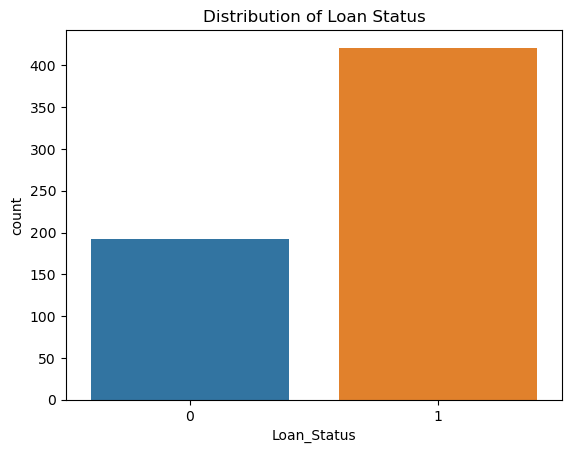

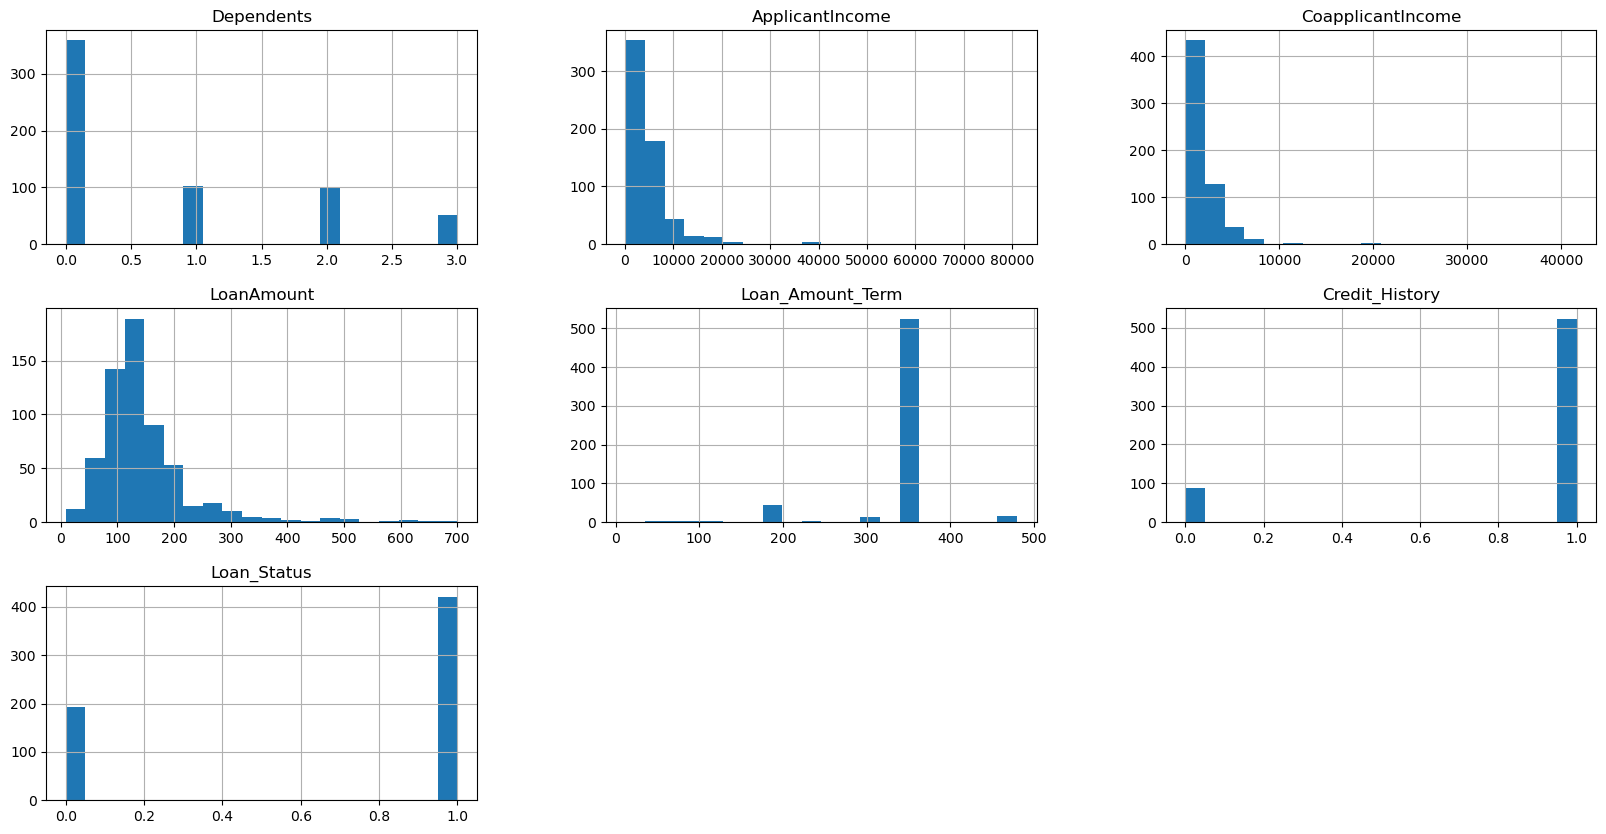

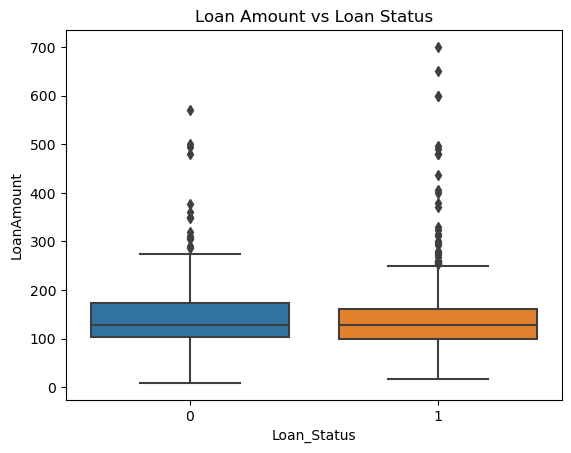

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of the target variable
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

# Filter numerical columns for histogram plotting
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Distribution of numerical features
df[numerical_cols].hist(bins=20, figsize=(20, 10), layout=(3, 3))  # Adjust layout based on your columns
plt.show()

# Explore relationships with the target variable
sns.boxplot(x='Loan_Status', y='LoanAmount', data=df)
plt.title('Loan Amount vs Loan Status')
plt.show()


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the dataset
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.8097826086956522
Confusion Matrix:
[[ 22  34]
 [  1 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.39      0.56        56
           1       0.79      0.99      0.88       128

    accuracy                           0.81       184
   macro avg       0.87      0.69      0.72       184
weighted avg       0.84      0.81      0.78       184



In [14]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

# Print cross-validation scores and mean score
cv_scores, cv_scores.mean()


(array([0.79032258, 0.82258065, 0.75806452, 0.73770492, 0.80327869,
        0.80327869, 0.8852459 , 0.85245902, 0.7704918 , 0.83606557]),
 0.8059492332099418)

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Grid search for best parameters
grid_search = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_

# Build the optimized model
optimized_model = LogisticRegression(max_iter=200, **best_params)
optimized_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_opt = optimized_model.predict(X_test)
accuracy_opt = accuracy_score(y_test, y_pred_opt)
conf_matrix_opt = confusion_matrix(y_test, y_pred_opt)
class_report_opt = classification_report(y_test, y_pred_opt)

best_params, accuracy_opt, conf_matrix_opt, class_report_opt


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

({'C': 1, 'solver': 'liblinear'},
 0.8097826086956522,
 array([[ 22,  34],
        [  1, 127]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.96      0.39      0.56        56\n           1       0.79      0.99      0.88       128\n\n    accuracy                           0.81       184\n   macro avg       0.87      0.69      0.72       184\nweighted avg       0.84      0.81      0.78       184\n')

In [16]:
# Final model
final_model = optimized_model

# Save the model if needed
import joblib
joblib.dump(final_model, 'final_loan_status_model.pkl')

# Load the model and make predictions
loaded_model = joblib.load('final_loan_status_model.pkl')
new_predictions = loaded_model.predict(X_test)

new_predictions[:10]  # Display the first 10 predictions


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)